<a href="https://colab.research.google.com/github/marialago/topicosInfo1/blob/main/Reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
imagem = cv2.imread('/content/reconhecimento.jpeg')

In [ ]:
from google.colab.patches import cv2_imshow


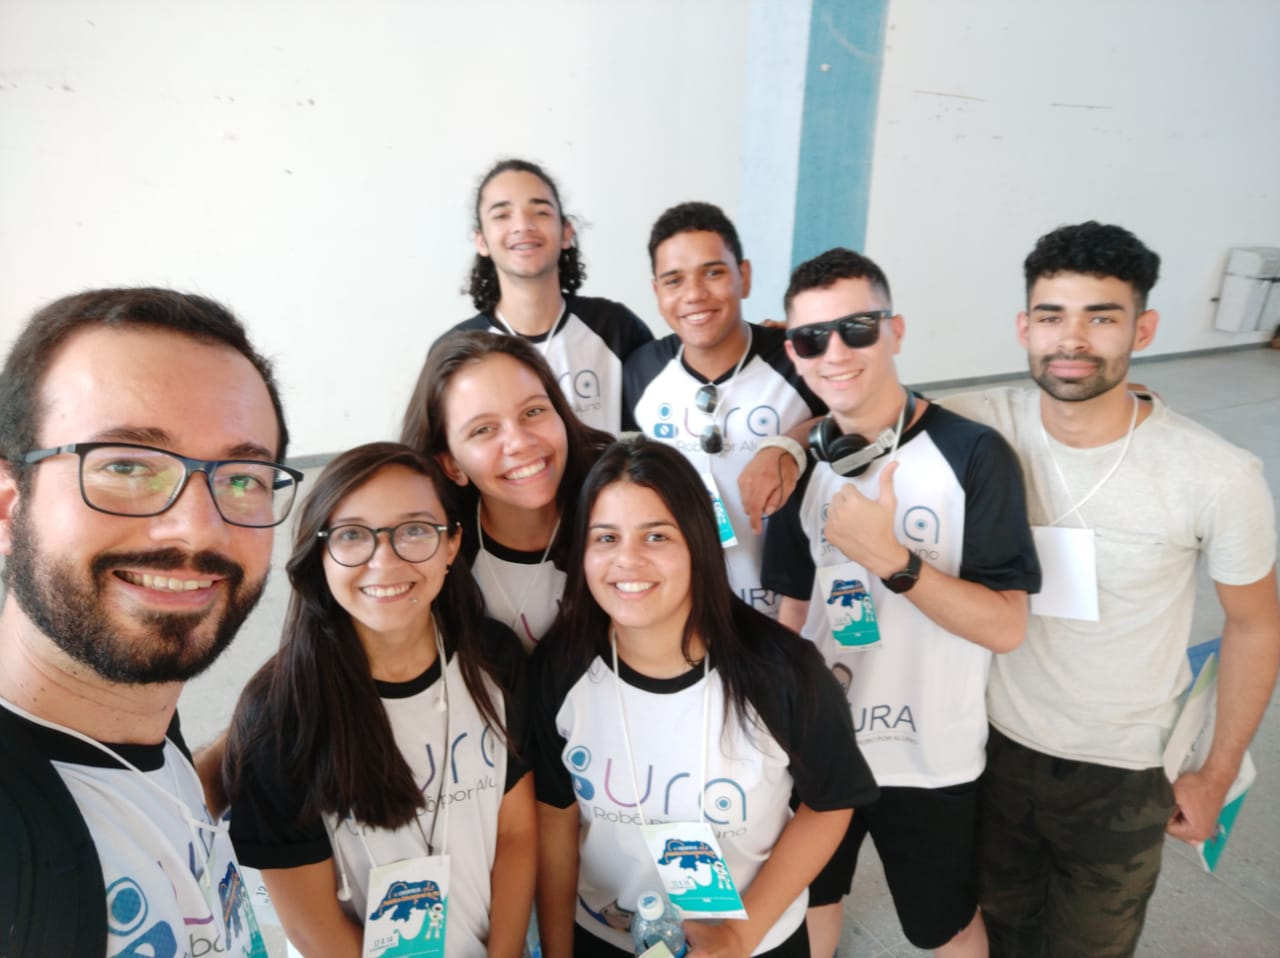

In [ ]:
cv2_imshow(imagem)

Detector facial

In [ ]:
detector_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

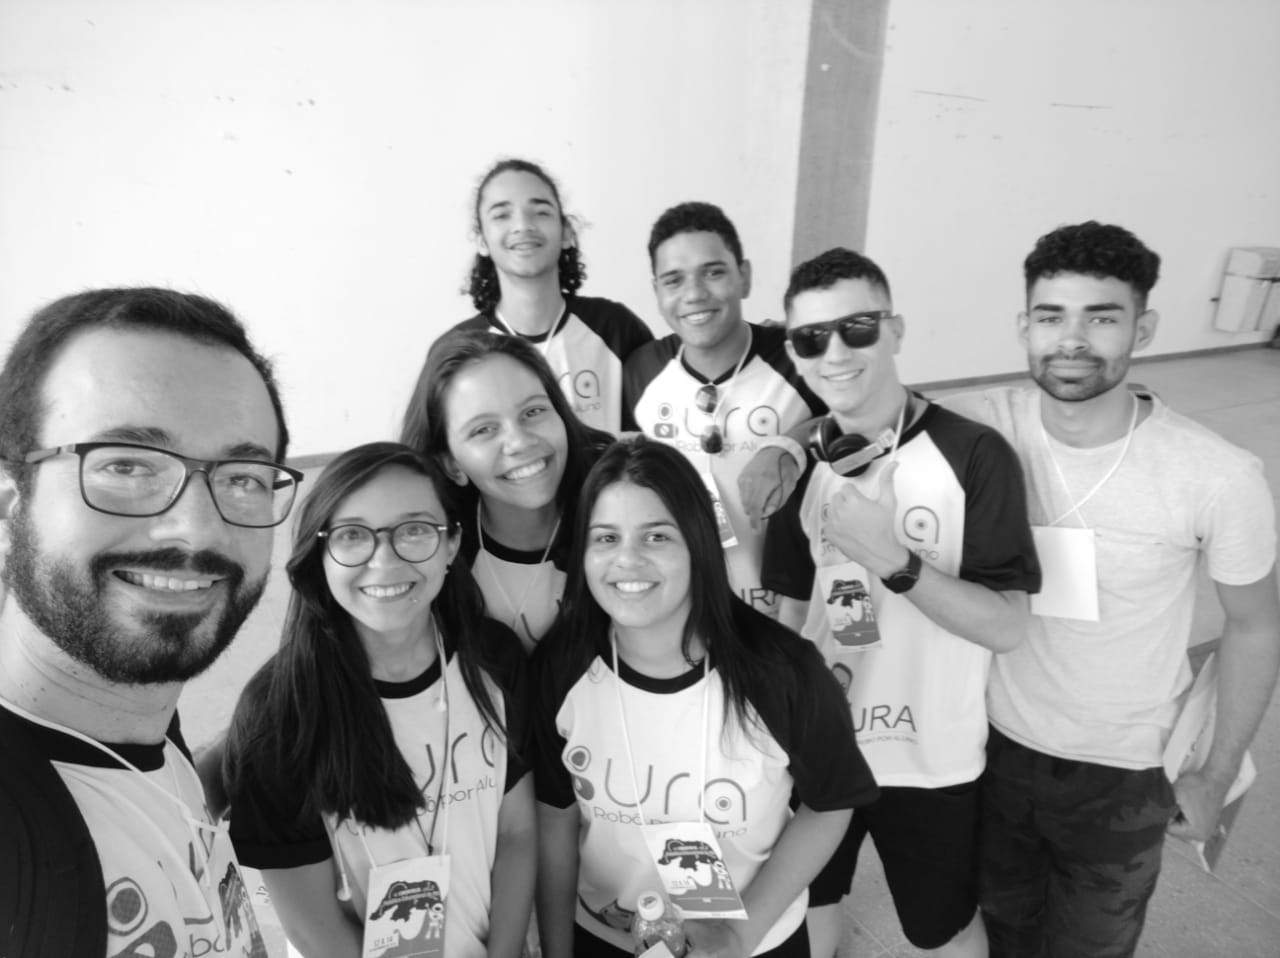

In [ ]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [ ]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.1, minSize=(30,30))

In [ ]:
deteccoes

array([[ 473,  173,   97,   97],
       [ 646,  236,  101,  101],
       [1005,  261,  139,  139],
       [ 761,  283,  145,  145],
       [ 433,  366,  144,  144],
       [  21,  380,  181,  181],
       [ 309,  474,  149,  149],
       [ 568,  489,  127,  127],
       [  25,  342,  302,  302],
       [ 798,  545,  127,  127]], dtype=int32)

In [ ]:
len(deteccoes)

10

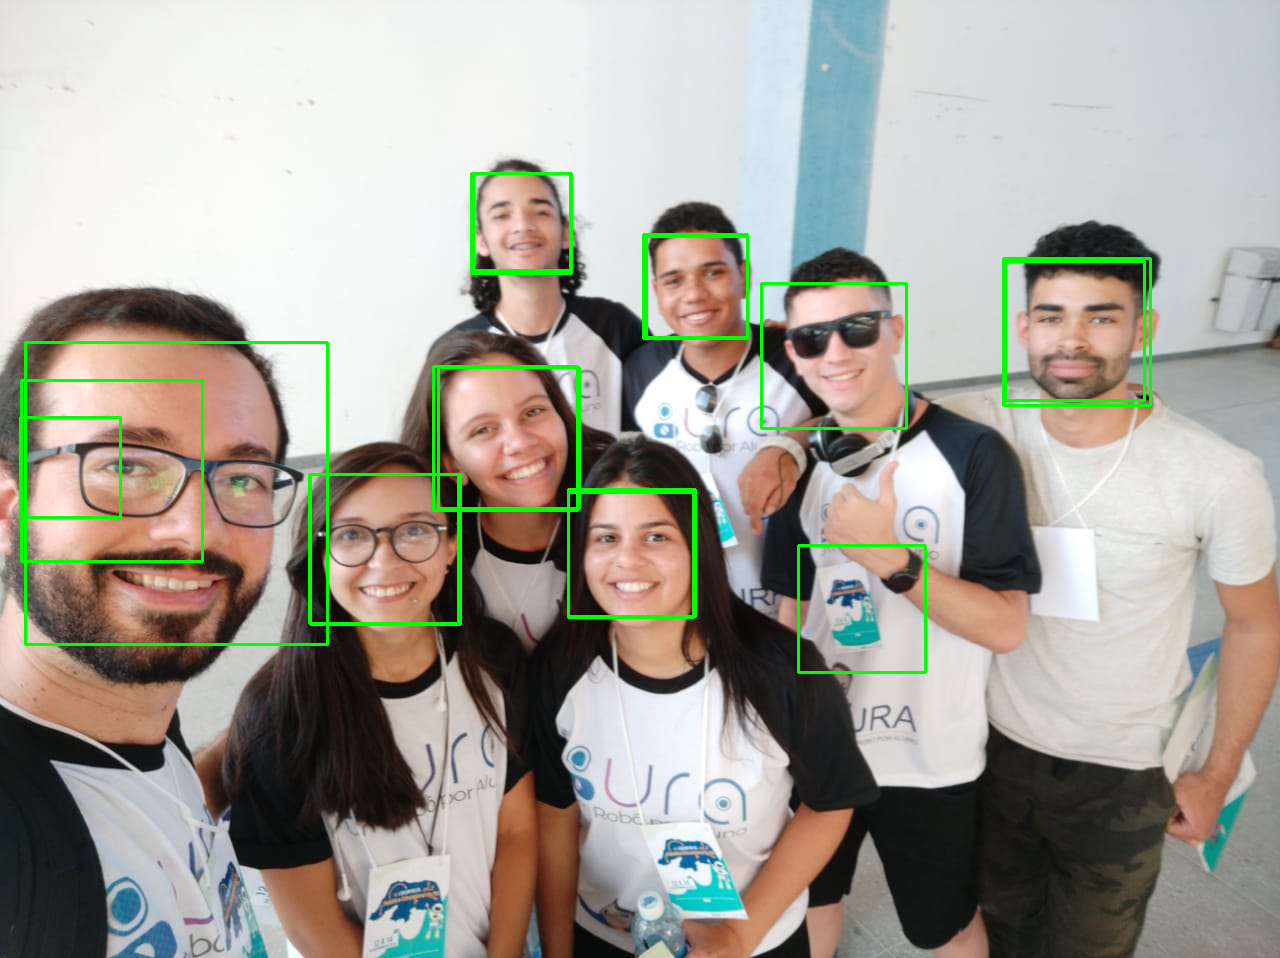

In [ ]:
for (x, y, l, a) in deteccoes:
  #print(x, y, l, a)
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(imagem)

# Reconhecimento facial

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/TurmaInfo1/trabalho final/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/treinamento', f) for f in os.listdir('/content/yalefaces/treinamento')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

[12  1  2  1  5  7  4  9 11 11  8 10  4  1 12  6  1  6  4 15  1  9 13 13
  9 14 10 13  4 15  8  9 10 11  1  3 14  5  2 15 14 12  4  3 13  4  5  2
  7  7 14 11 12  8  7  2 13 11 15  7  8  3  2  6  7 15 14  5 10  6  8 11
  3 11  5 13  1  9  7 14  5 14  6  6  7 12  2  2  7 10  7 14 10  6  2 11
 15  1 14  9 13 14  8  1  9 12  8 13 12 13  8  3  3  8  5 13 12  9  1  6
  3 15 10  5  3 15 15 13 11  4  6  4  3  9  5  4  6  8  5  5  4  6  2 10
  8 15 11 10 12  3 10 11  4 14 10  9  7  3 12  2  1  2 15  9 12]


In [ ]:
print(faces[0])

[[130 128 108 ... 253 244 255]
 [255 255 220 ... 249 243 255]
 [246 223 232 ... 252 241 255]
 ...
 [249 246 255 ... 160 161 163]
 [255 252 255 ... 154 159 163]
 [ 68  68  68 ...  68  68  68]]


In [ ]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

In [ ]:
print(faces[1])

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [ ]:
imagem_treinamento = '/content/yalefaces/treinamento/subject01.leftlight'

# Classificador

In [ ]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [ ]:
imagem_teste = '/content/yalefaces/teste/subject01.leftlight'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 216 224 244]
 [255 255 255 ... 215 220 245]
 [255 255 255 ... 231 211 231]
 ...
 [255 255 255 ... 192 197 203]
 [255 255 255 ... 189 207 215]
 [ 68  68  68 ...  68  68  68]]


In [ ]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto
##mostra qual a previsão da imagem

1

In [ ]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

##a resposta da imagem escolhida

1

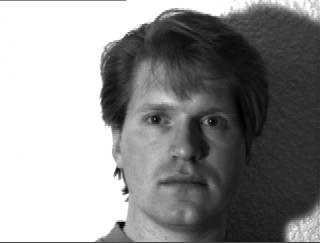

In [ ]:
cv2_imshow(imagem_np)

# Acurácia

In [ ]:
#Percorer todo o conjunto de teste / Trocando as Variaveis
def dados_imagem_teste():
  caminhos = [os.path.join('/content/yalefaces/teste', f) for f in os.listdir('/content/yalefaces/teste')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/teste/.ipynb_checkpoints':
      continue
    if caminho == '/content/yalefaces/teste/Readme.txt':
      continue
    # Usar somente centerlight para testes
    if os.path.split(caminho)[1].split('.')[1] != 'centerlight':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
#Chamar a funçar e deixar em 2 variaveis
ids_teste,faces_teste = dados_imagem_teste()

In [ ]:
#percorrer todas as faces em face_teste com reconhecedor.teste
sum = 0;
for face, id in zip(faces_teste, ids_teste):
    idprevisto, _ = reconhecedor.predict(face)
    if idprevisto == id:
      sum = sum + 1
acuracia = (sum / len(ids_teste)) * 100
print(acuracia)

100.0
